# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import wilcoxon
from utils import plot_longitudinal

# Compute GMHI2 scores

In [2]:
study = "P43"

In [3]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_val.csv"), index_col=[0, 1]).loc[study]
X.head()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Hordeivirus|s__Barley_stripe_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN13241759,0.032740,0.032740,0.032740,0.032740,0.032740,0.032740,0.032740,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.007964,0.007964,0.007964,0.007964,0.007964,0.007964,0.007964,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.002622,0.002622,0.002622,0.002622,0.002622,0.002622,0.002622,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata_val.csv"), index_col=[0, 1, 2]).loc[study]
meta["GMHI2"] = gmhi2.decision_function(X > config.PRESENCE_CUTOFF)
meta.index = meta.index.get_level_values(1)
meta.head()

,health_status/host_diet,timepoint,GMHI2
Subject_ID,,,
B,Healthy,T6,1.739512
B,Healthy,T5,1.868732
A,Healthy,T2,0.439273
A,Healthy,T1,0.816675
B,Healthy,T4,1.877196


# Compute other indices

In [6]:
X_species = X[[col for col in X.columns if "s__" in col and "virus" not in col and "unclassified" not in col]]
X_species.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata|o__Methanomassiliicoccales|f__Methanomassiliicoccaceae|g__Methanomassiliicoccus|s__Candidatus_Methanomassiliicoccus_intestinalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_sp_oral_taxon_183,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_cardiffensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_georgiae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_hongkongensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_johnsonii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_massiliensis,...,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Borreliaceae|g__Borreliella|s__Borreliella_garinii,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_lecithinolyticum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_maltophilum,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_medium,k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Spirochaetaceae|g__Treponema|s__Treponema_vincentii,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Acetomicrobium|s__Acetomicrobium_flavidum,k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Cloacibacillus|s__Cloacibacillus_sp_An23,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Acholeplasmatales|f__Acholeplasmataceae|g__Candidatus_Phytoplasma|s__Aster_yellows_witches_broom_phytoplasma,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_sp_HU2014
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMN13241759,0.032740,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.007964,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.000000,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.000039,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
SAMN13241759,0.002622,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
meta["Species Richness"] = np.sum(X_species > config.PRESENCE_CUTOFF, axis=1).values
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness
Subject_ID,,,,
B,Healthy,T6,1.739512,98
B,Healthy,T5,1.868732,98
A,Healthy,T2,0.439273,47
A,Healthy,T1,0.816675,74
B,Healthy,T4,1.877196,95


In [8]:
meta["Shannon Diversity"] = np.sum(-1 * (X_species * np.log(X_species)).fillna(0).values, axis=1)
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity
Subject_ID,,,,,
B,Healthy,T6,1.739512,98,3.089484
B,Healthy,T5,1.868732,98,3.203879
A,Healthy,T2,0.439273,47,1.322823
A,Healthy,T1,0.816675,74,2.538005
B,Healthy,T4,1.877196,95,3.155489


In [9]:
meta.index.unique()

Index(['B', 'A', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C'], dtype='object', name='Subject_ID')

# Plot stuff now 

In [10]:
meta["timepoint_plot"] = [int(time[1:]) - 1 for time in meta["timepoint"]]
meta.head()

,health_status/host_diet,timepoint,GMHI2,Species Richness,Shannon Diversity,timepoint_plot
Subject_ID,,,,,,
B,Healthy,T6,1.739512,98,3.089484,5
B,Healthy,T5,1.868732,98,3.203879,4
A,Healthy,T2,0.439273,47,1.322823,1
A,Healthy,T1,0.816675,74,2.538005,0
B,Healthy,T4,1.877196,95,3.155489,3


In [11]:
timepoints_sorted = sorted(list(meta["timepoint"].unique()), key=lambda x : int(x[1:]))
timepoints_sorted

['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

In [12]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

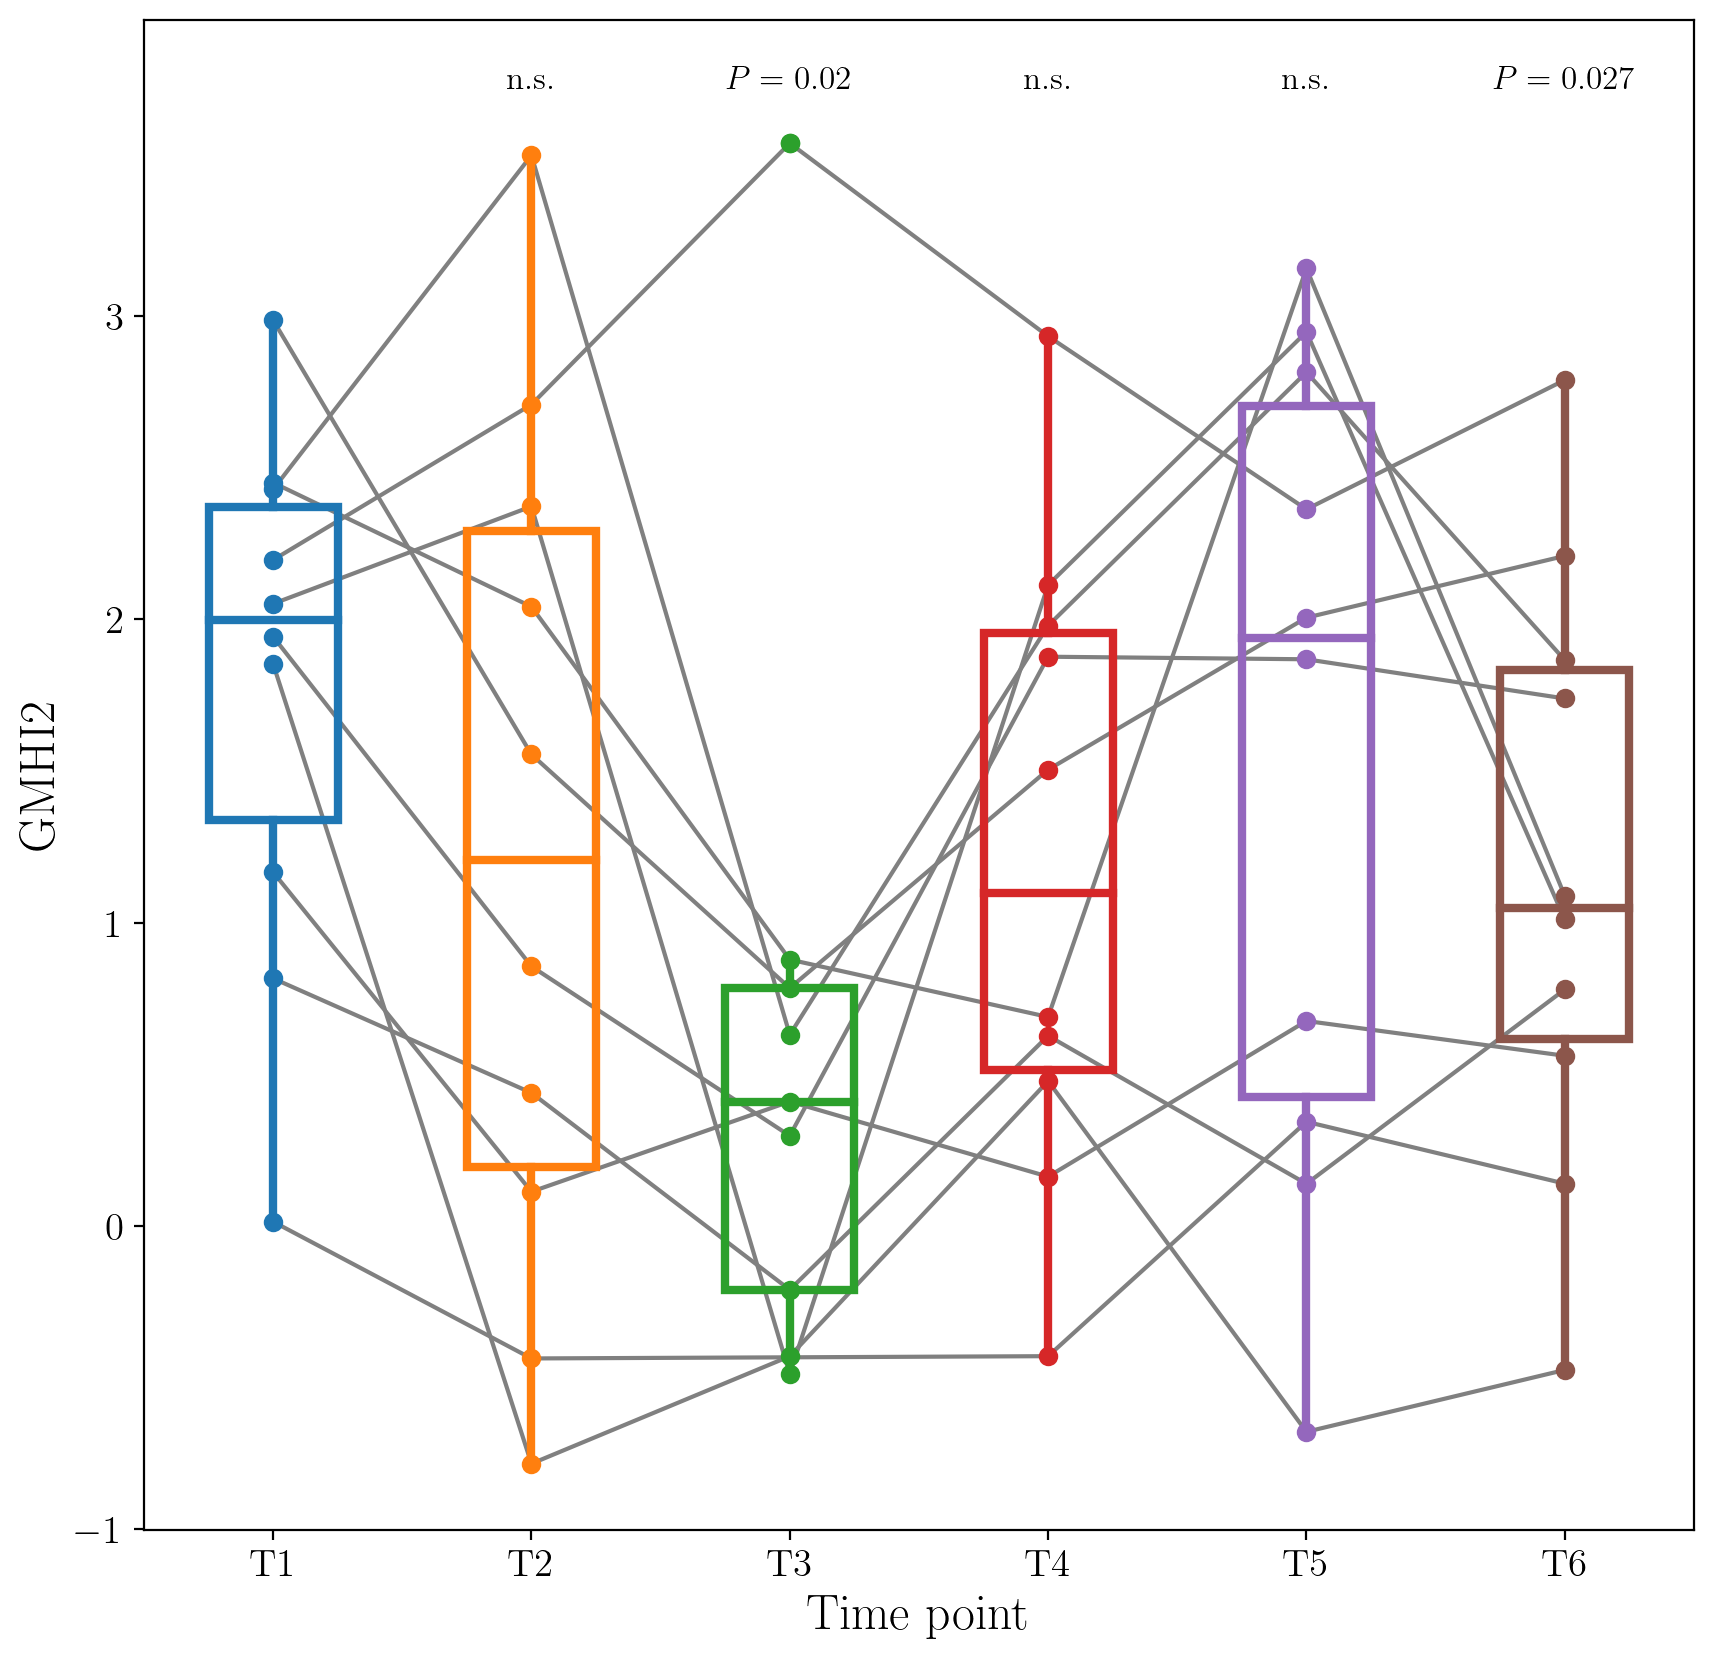

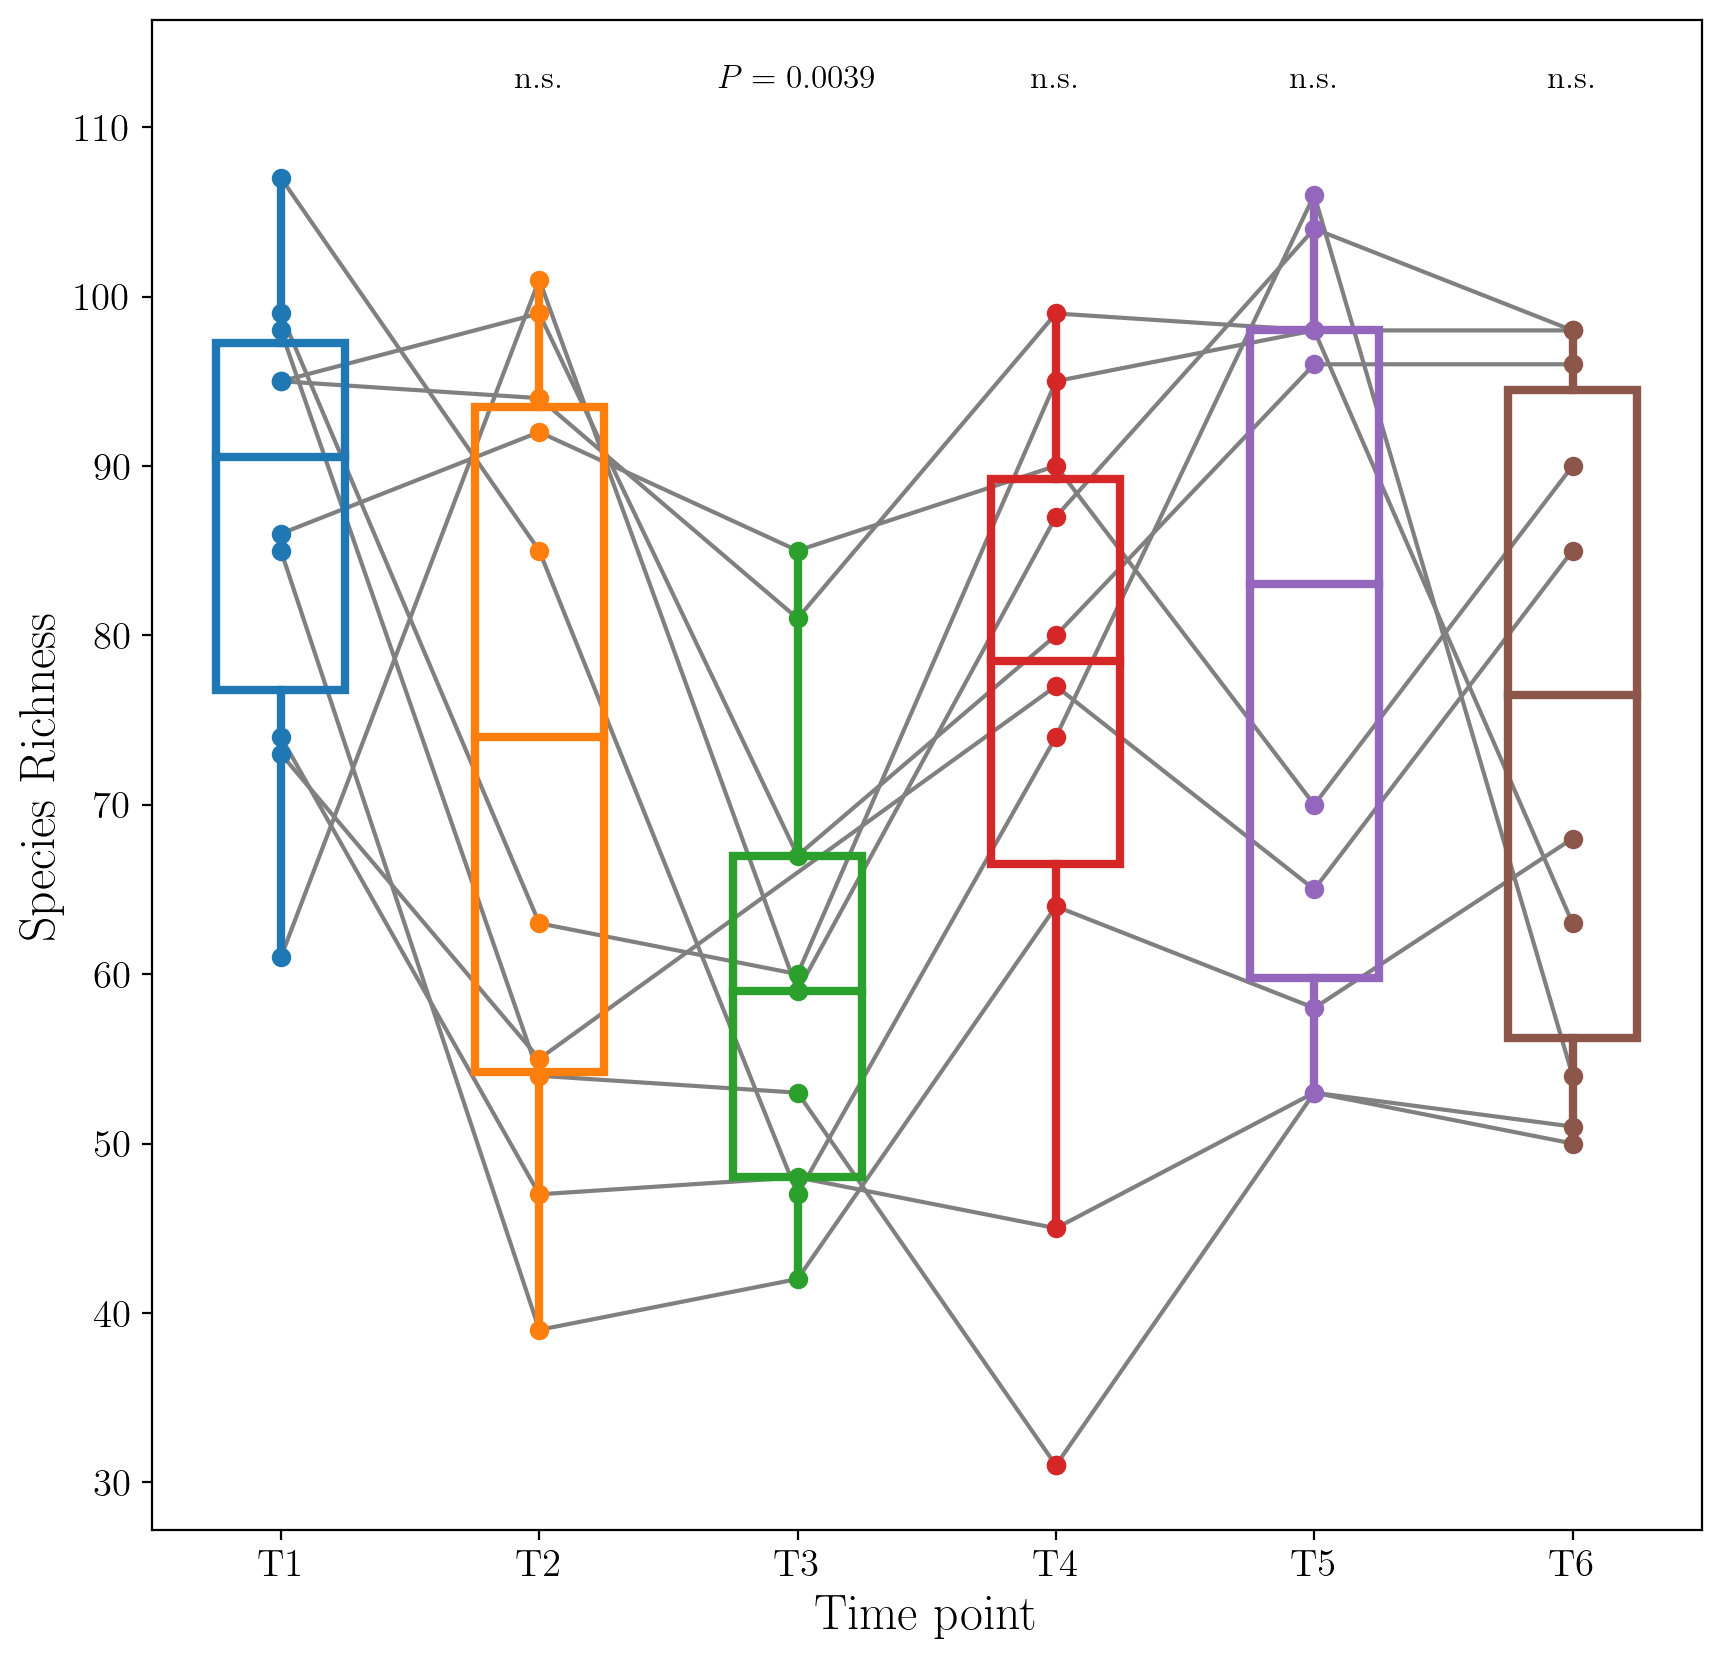

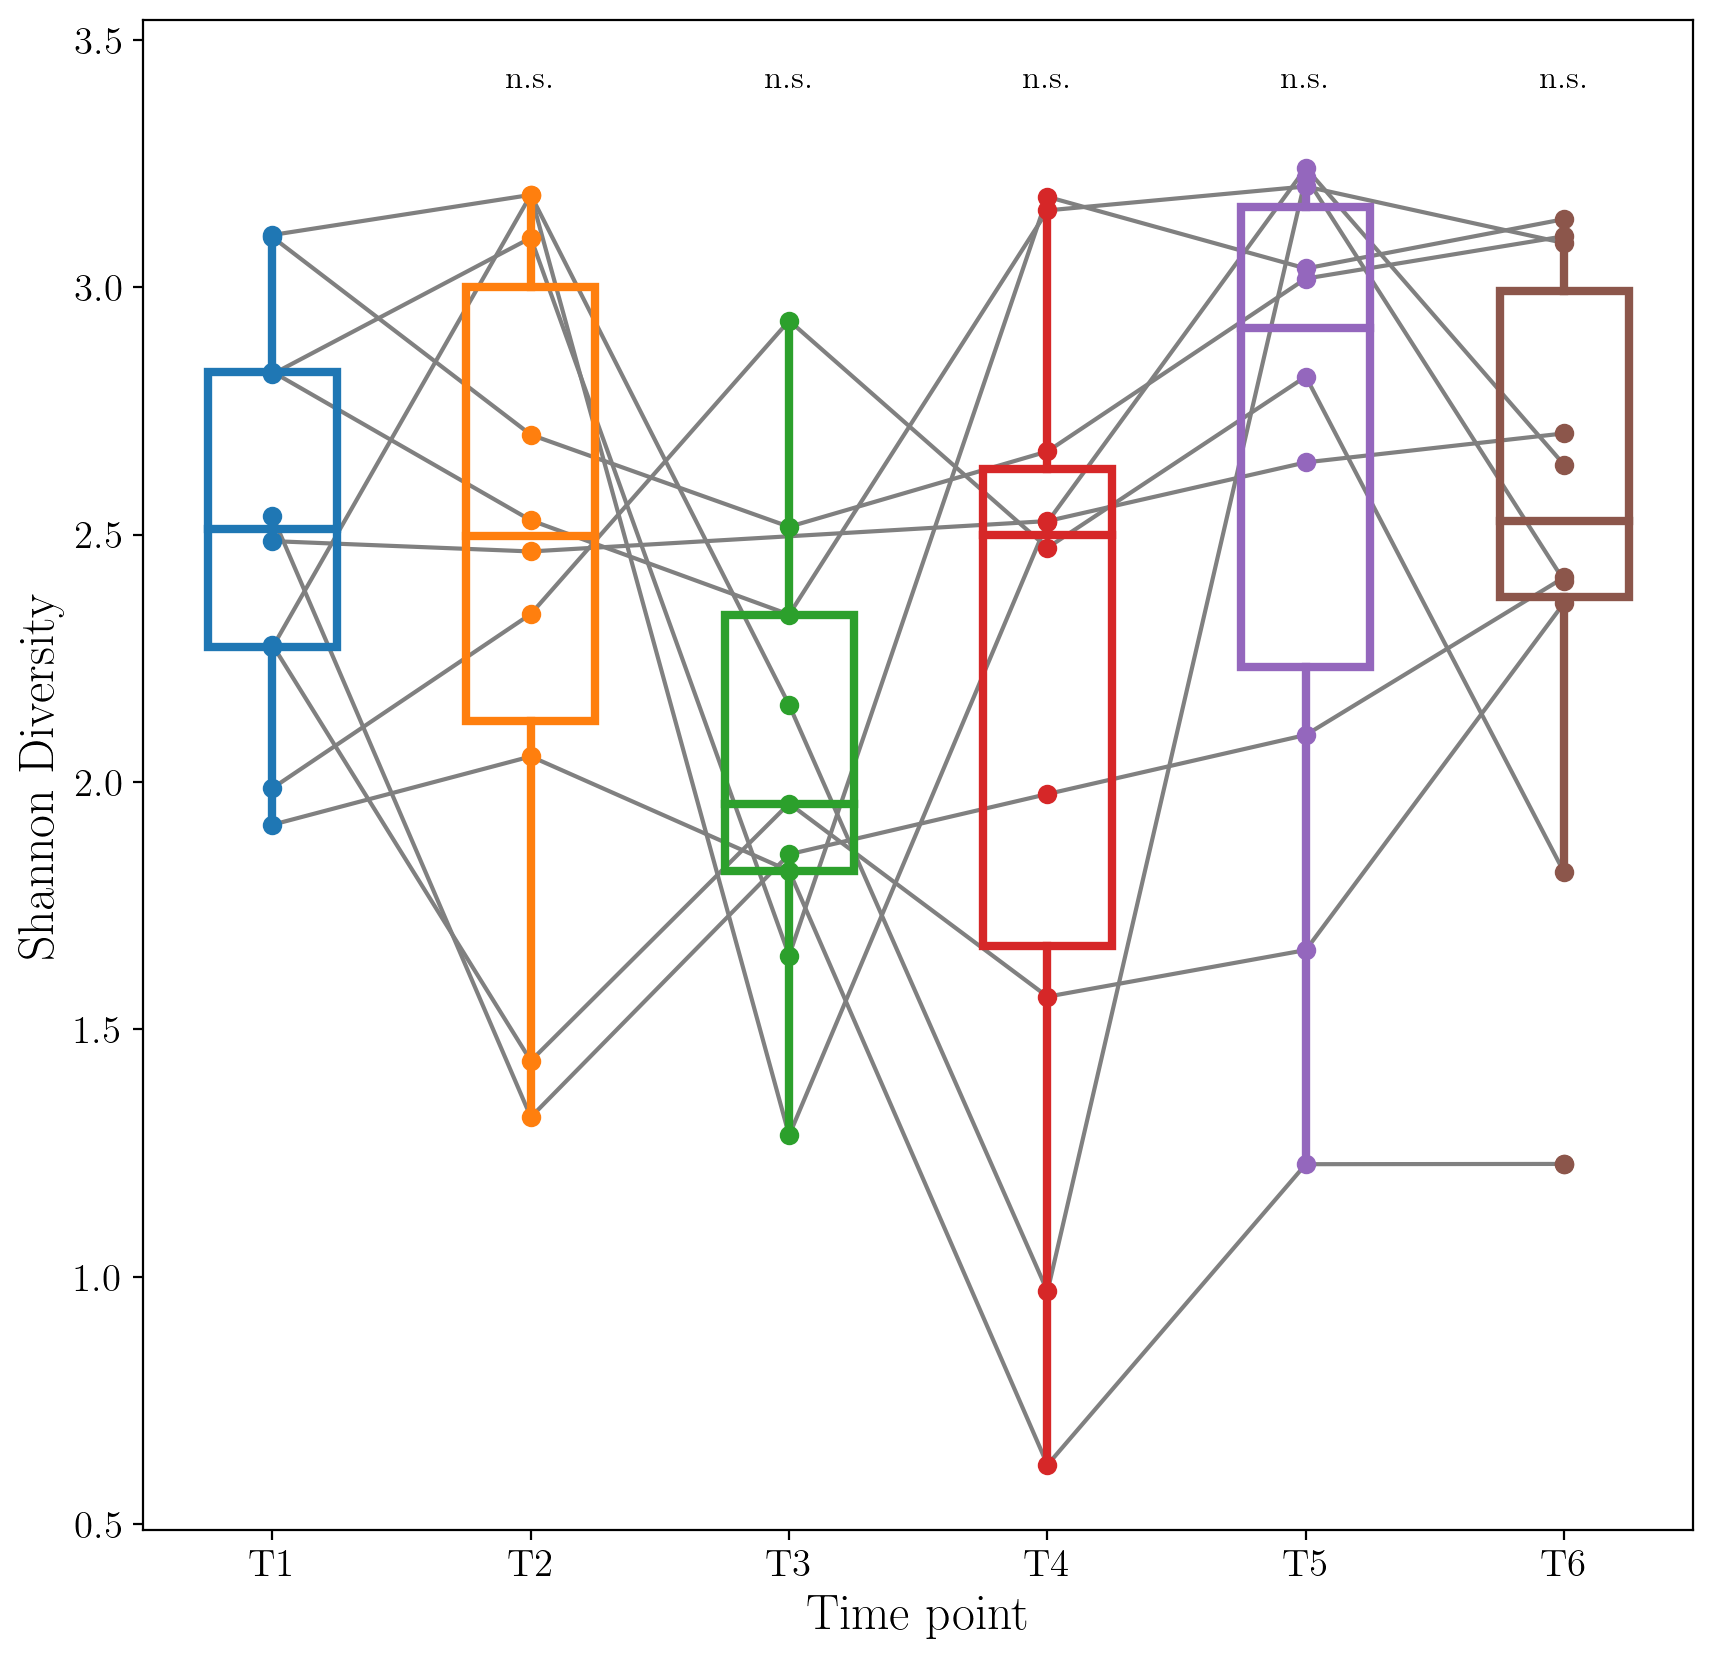

In [13]:
plot_longitudinal(meta, "GMHI2", timepoints_sorted, study)
plot_longitudinal(meta, "Species Richness", timepoints_sorted, study)
plot_longitudinal(meta, "Shannon Diversity", timepoints_sorted, study)